<a href="https://colab.research.google.com/github/Fuenfgeld/ATeamDatenmanagementUndArchivierung/blob/main/IMECOS_master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kursarbeit Datenmanagement und -Archivierung WS 20/21
### Master-Code [IMECOS-Projekt](https://github.com/Fuenfgeld/ATeamDatenmanagementUndArchivierung)


---



### Datenbankinitialisierung & Import der CSV-Dateien:

In [ ]:
# initialize the database, see import statements in *implementation.py
import requests
exec(requests.get('https://raw.githubusercontent.com/Fuenfgeld/ATeamDatenmanagementUndArchivierung/main/src/source_database_implementation.py').text)



*   Verbindung zu Googledrive herstellen (Ablageort der CSV-Dateien)
*   Verbindung zu SQLite herstellen
*   Datebankinitialisierung im *Memory*
*   [Quelldaten](https://github.com/Fuenfgeld/ATeamDatenmanagementUndArchivierung/wiki/Quelldatenmodell)import
*   Ausgabe der Connection- und Cursor-Synthax


---






### Lösung der Issues zur Datenqualität:

In [ ]:
# decions about the design of the star scheme have followed several deeper looks into the data. Included here for documentation purpose.
# EXECUTION OF THIS CELL IS OPTIONAL!
exec(requests.get('https://raw.githubusercontent.com/Fuenfgeld/ATeamDatenmanagementUndArchivierung/main/tools/data_clearing_SQL_queries.py').text)

Documentation of SQL-Queries for Data Clearing Issues
Type
> data_clearing_queries()
with the desired Issue# as argument to see the SQL-Script and query result.
Possible issue#s: 12, 13, 14, 15, 30


Legende zu den GitHub-Issues:


[#12](https://github.com/Fuenfgeld/ATeamDatenmanagementUndArchivierung/issues/12), 
[#13](https://github.com/Fuenfgeld/ATeamDatenmanagementUndArchivierung/issues/13),
[#14](https://github.com/Fuenfgeld/ATeamDatenmanagementUndArchivierung/issues/14),
[#15](https://github.com/Fuenfgeld/ATeamDatenmanagementUndArchivierung/issues/15),
[#30](https://github.com/Fuenfgeld/ATeamDatenmanagementUndArchivierung/issues/30).


---





Optionale Ausgabe der Clearing-Queries:

In [ ]:
data_clearing_queries(30)



---



###ETL-Prozess:

In [ ]:
# ETL process
# CREATE VIEW for central table  (but with DESCRIPTIONS)
cur.executescript(requests.get('https://raw.githubusercontent.com/Fuenfgeld/ATeamDatenmanagementUndArchivierung/main/tools/ETL_create_view_central.sql').text)
conn.commit()
# Perform Extraction, Transformation and Loading into new database
exec(requests.get('https://raw.githubusercontent.com/Fuenfgeld/ATeamDatenmanagementUndArchivierung/main/tools/ETL_process.py').text)

Successfully Extracted Data
Successfully Transformed Data
Successfully Connected to SQLite
Loaded research data
('payers',)
('code_master',)
('encounters',)
('patients',)
Successfully finished ETL process
Research database ready for work
  
      conn_new    -    is the name of the connection object
      cur_new     -    is the name of the cursor
      
      



*   Tabllen-Views erstellen ([ETL_create_view_central.sql](https://github.com/Fuenfgeld/ATeamDatenmanagementUndArchivierung/blob/main/tools/ETL_create_view_central.sql))
*   Datenextraktion durch [ETL_process.py](https://github.com/Fuenfgeld/ATeamDatenmanagementUndArchivierung/blob/main/tools/ETL_process.py)
*   Verbindung zu SQLite herstellen
*   Datebankinitialisierung im *Memory*
*   Anzeige der erstellten Post-ETL Tabellen
*   Ausgabe der neuen Connection- und Cursor-Synthax


---


# Deskriptive Analysen des Forschungsdatensatzes

Import der [Seaborn](https://seaborn.pydata.org/)-Umgebungen zur grafischen Analyse & Befüllen der Dataframes:

In [ ]:
# import plot libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# save tables from DB into dataframe
encounters = pd.read_sql_query("SELECT * FROM encounters", conn_new)
patients = pd.read_sql_query("SELECT * FROM patients", conn_new)



*   Deskriptive Statisktik der Dataframes



In [ ]:
# Descriptive statistics PATIENTS
print("Patients:")
patients.info()
print()
print("Encounters:")
encounters.info()



---
*   Berechung des Patientenalters & Altersverteilung in Studienpopulation:


In [18]:
# Convert date columns
patients["BIRTHDATE"] = pd.to_datetime(patients["BIRTHDATE"])
patients["DEATHDATE"] = pd.to_datetime(patients["DEATHDATE"])
# calcute patient age
patients["AGE"] = patients.DEATHDATE.dt.year - patients.BIRTHDATE.dt.year
patients["AGE"] = patients["AGE"].fillna(2021 - patients.BIRTHDATE.dt.year)

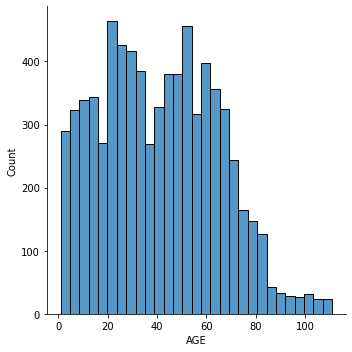

In [19]:
# patients age distribution
sns.displot(patients["AGE"])



---



*   Analyse des Familienstandes innerhalb der Studienpopulation:





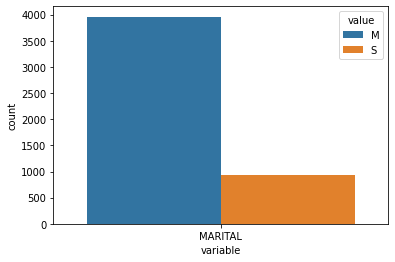

In [20]:
# patients marital
sns.countplot(x="variable", hue= "value", data=pd.melt(patients[["MARITAL"]]))



---



*   Analyse der Abstammung innerhalb der Studienpopulation:





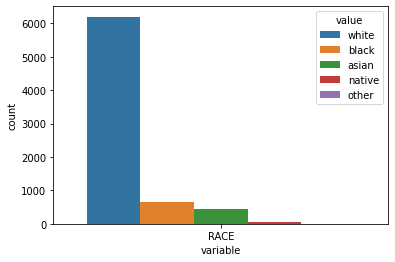

In [21]:
# patients race
sns.countplot(x="variable", hue= "value", data=pd.melt(patients[["RACE"]]))



---



*   Analyse der Geschlechterveretilung innerhalb der Studienpopulation:





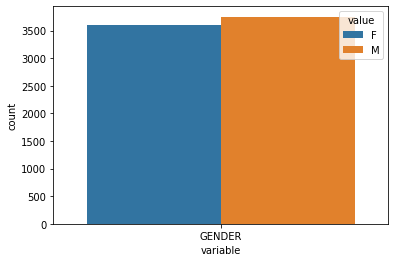

In [22]:
# patients gender
sns.countplot(x="variable", hue= "value", data=pd.melt(patients[["GENDER"]]))

# Forschungsfragen
### 1.
### 2. 
### 3.